<a href="https://colab.research.google.com/github/Ragnov/EDA/blob/main/Covid_Vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid Vaccine EDA**

In [ ]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

In [ ]:
country_vac = pd.read_csv('/content/country_vaccinations.csv')
tweet_vac = pd.read_csv('/content/vaccination_all_tweets.csv')

In [ ]:
country_vac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [ ]:
tweet_vac.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
print("Country Vaccination shape:", country_vac.shape)
print("Tweet Vaccination shape:", tweet_vac.shape)

Country Vaccination shape: (8451, 15)
Tweet Vaccination shape: (40171, 16)


**Data Description** <br/>
*Country Vaccination* <br/>
Country- this is the country for which the vaccination information is provided;<br/>
- Country ISO Code - ISO code for the country;<br/>
- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;<br/>
- Total number of vaccinations - this is the absolute number of total immunizations in the country;<br/>
- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;<br/>
- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;<br/>
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;<br/>
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;<br/>
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;<br/>
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;<br/>
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;<br/>
- Number of vaccinations per day - number of daily vaccination for that day and country;<br/>
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;<br/>
- Vaccines used in the country - total number of vaccines used in the country (up to date);<br/>
- Source name - source of the information (national authority, international organization, local organization etc.);<br/>
- 
Source website - website of the source of information;<br/>

In [ ]:
country_vac.info()
print('-'*70)
tweet_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8451 non-null   object 
 1   iso_code                             8451 non-null   object 
 2   date                                 8451 non-null   object 
 3   total_vaccinations                   5231 non-null   float64
 4   people_vaccinated                    4688 non-null   float64
 5   people_fully_vaccinated              3186 non-null   float64
 6   daily_vaccinations_raw               4415 non-null   float64
 7   daily_vaccinations                   8260 non-null   float64
 8   total_vaccinations_per_hundred       5231 non-null   float64
 9   people_vaccinated_per_hundred        4688 non-null   float64
 10  people_fully_vaccinated_per_hundred  3186 non-null   float64
 11  daily_vaccinations_per_million

In [ ]:
#Missing data in 1st dataset
country_vac.isnull().sum().sort_values(ascending = False)

people_fully_vaccinated_per_hundred    5265
people_fully_vaccinated                5265
daily_vaccinations_raw                 4036
people_vaccinated_per_hundred          3763
people_vaccinated                      3763
total_vaccinations_per_hundred         3220
total_vaccinations                     3220
daily_vaccinations_per_million          191
daily_vaccinations                      191
source_website                            0
source_name                               0
vaccines                                  0
date                                      0
iso_code                                  0
country                                   0
dtype: int64

In [ ]:
#Missing data in 2nd dataset
tweet_vac.isnull().sum().sort_values(ascending = False)

user_location       9135
hashtags            8575
user_description    2718
source                36
is_retweet             0
favorites              0
retweets               0
text                   0
date                   0
user_verified          0
user_favourites        0
user_friends           0
user_followers         0
user_created           0
user_name              0
id                     0
dtype: int64

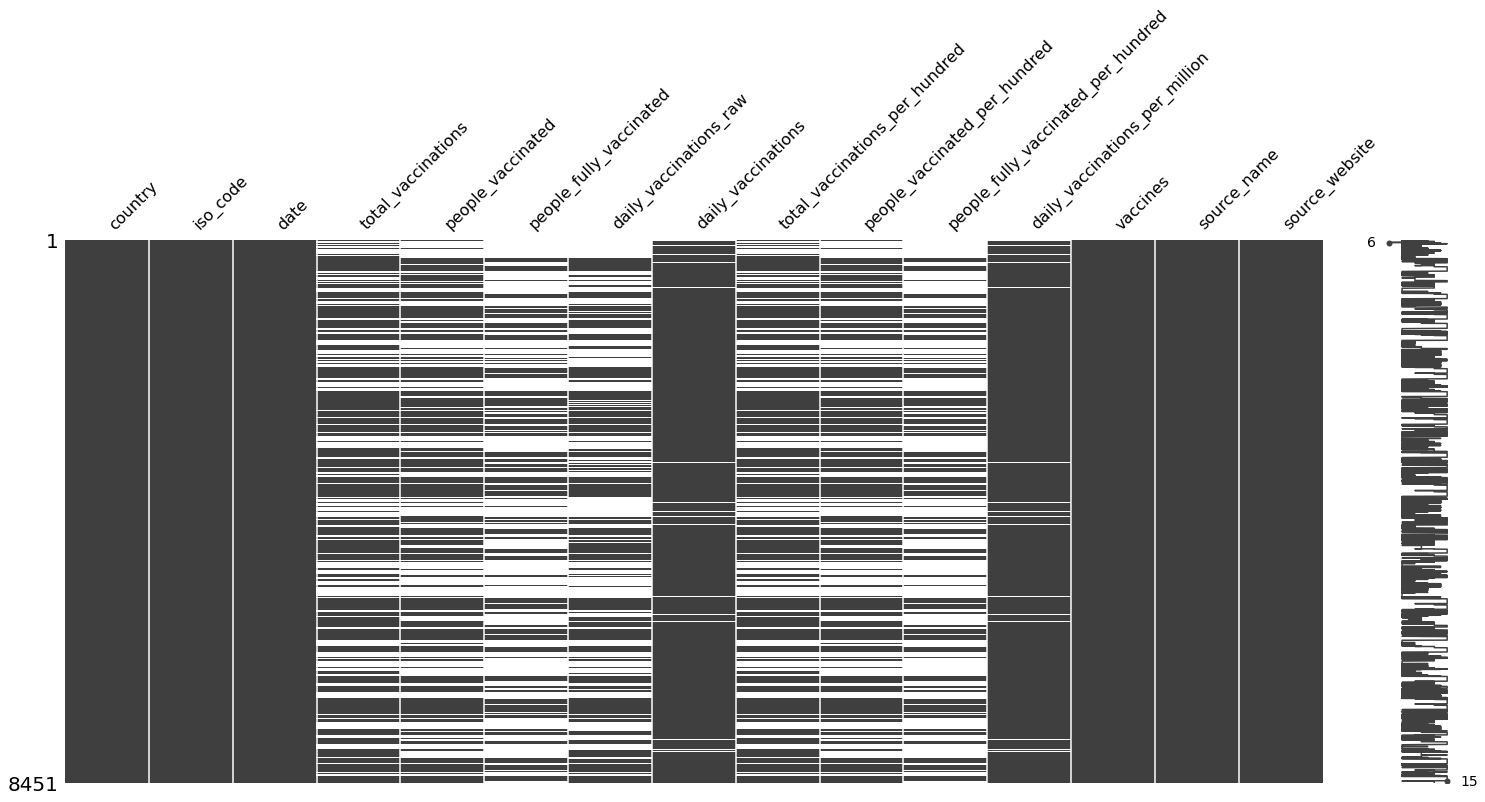

In [ ]:
missingno.matrix(country_vac)

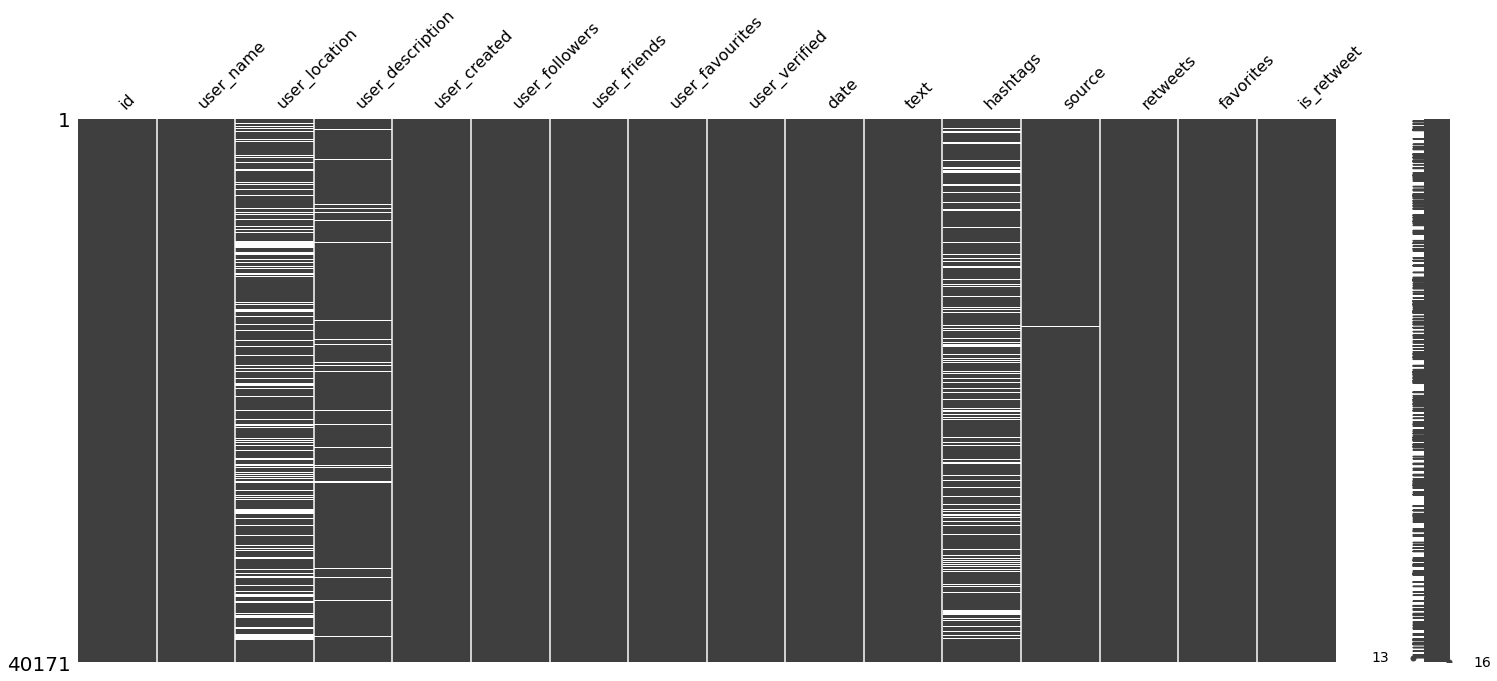

In [ ]:
missingno.matrix(tweet_vac)

In [ ]:
country_vac["country"].value_counts(dropna=False)

Canada                              104
United Kingdom                      104
England                             104
Scotland                            104
Wales                               104
                                   ... 
Saint Vincent and the Grenadines      3
Laos                                  1
Bahamas                               1
Guinea                                1
Equatorial Guinea                     1
Name: country, Length: 154, dtype: int64

In [ ]:
clean_country_vac = country_vac.fillna(0)
clean_country_vac.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
clean_tweet_vac = tweet_vac.fillna(0)
clean_tweet_vac.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

Text(0, 0.5, 'People Vaccinated per hundred')

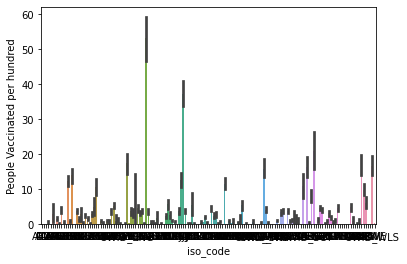

In [ ]:
sns.barplot(x= 'iso_code', y='people_vaccinated_per_hundred',data =clean_country_vac)
plt.ylabel('People Vaccinated per hundred')

In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 296kB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(clean_country_vac)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



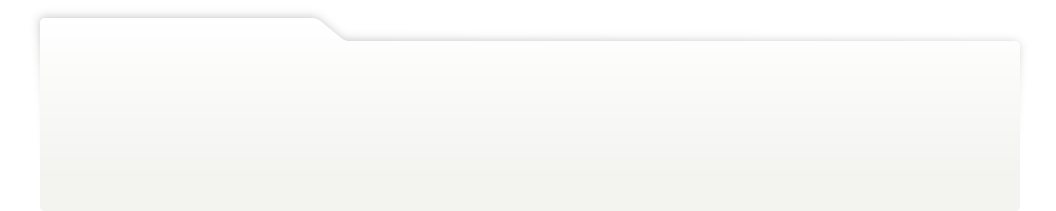
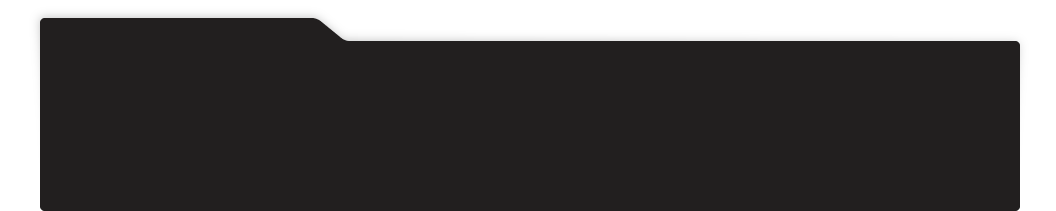
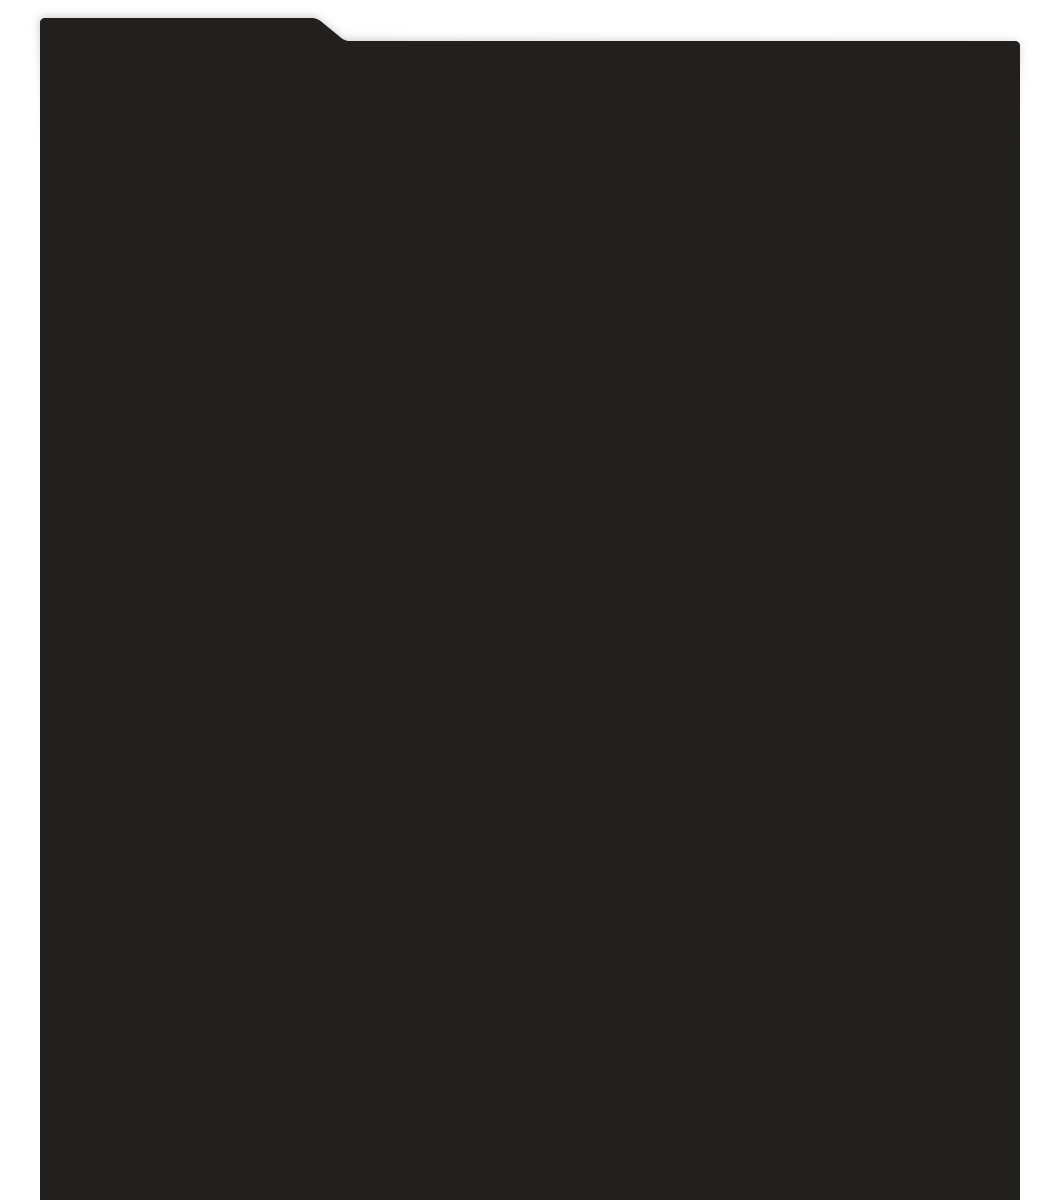
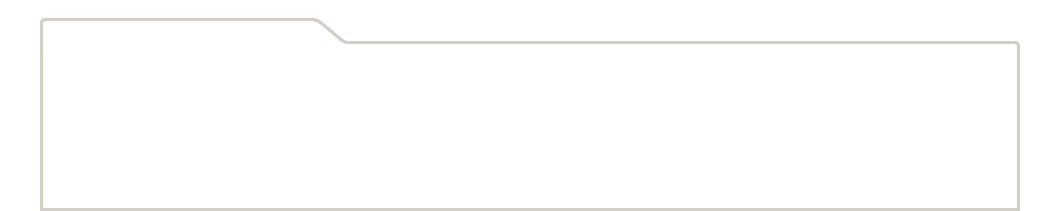
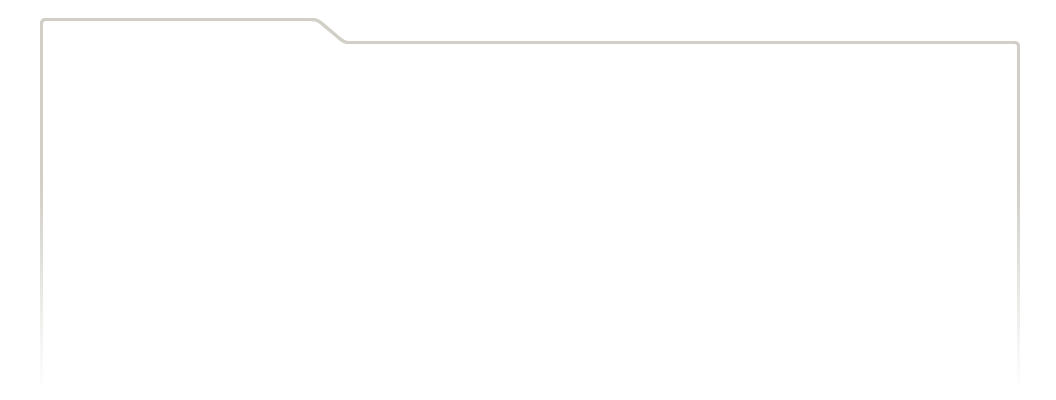
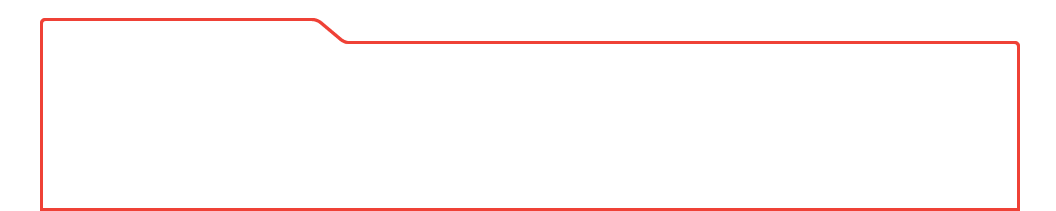
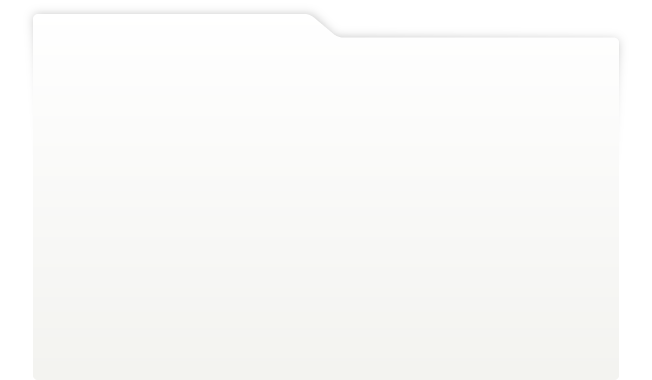
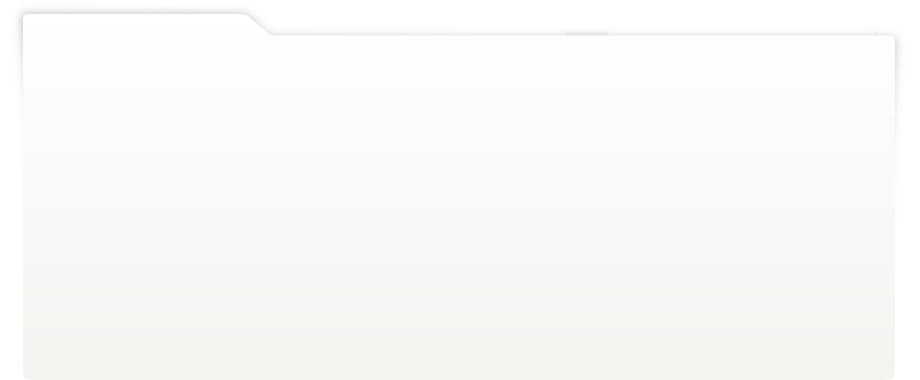
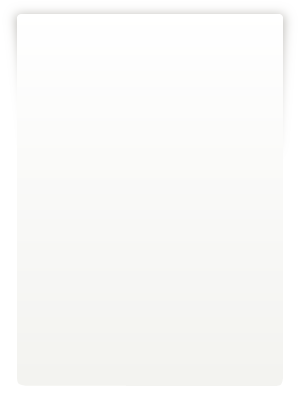
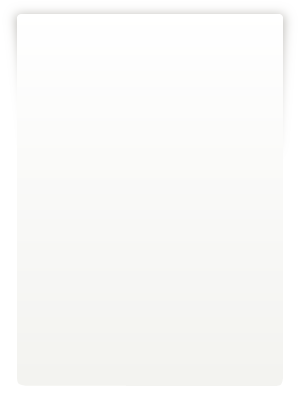
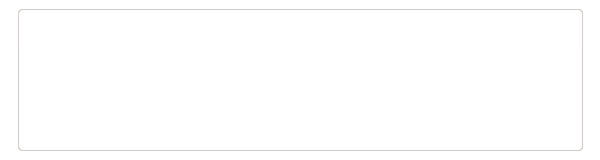
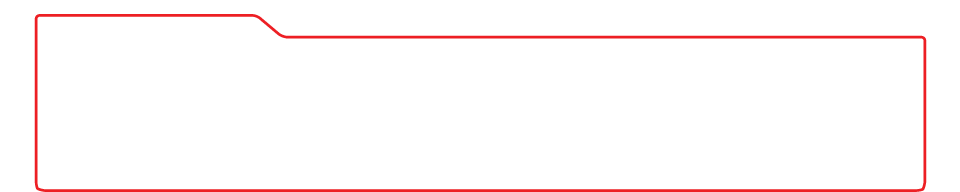
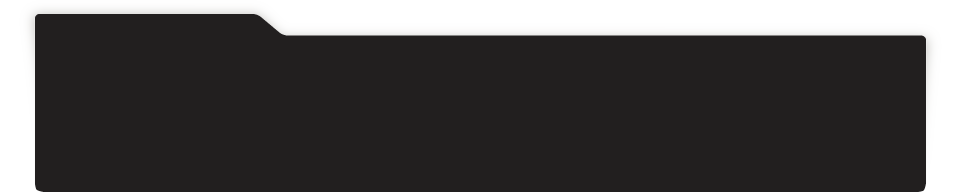
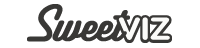
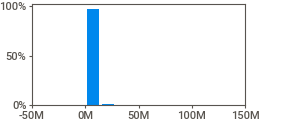
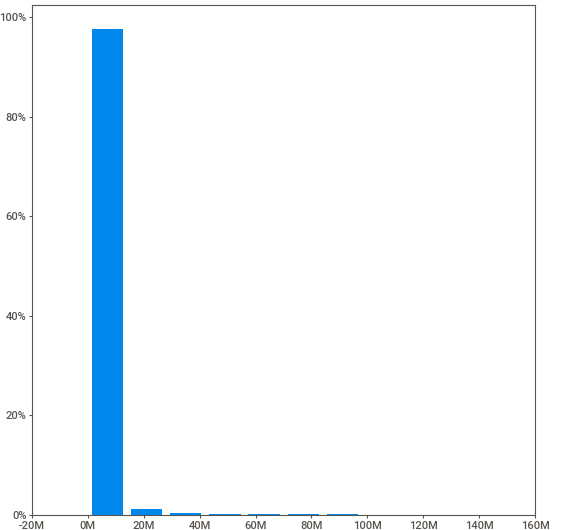
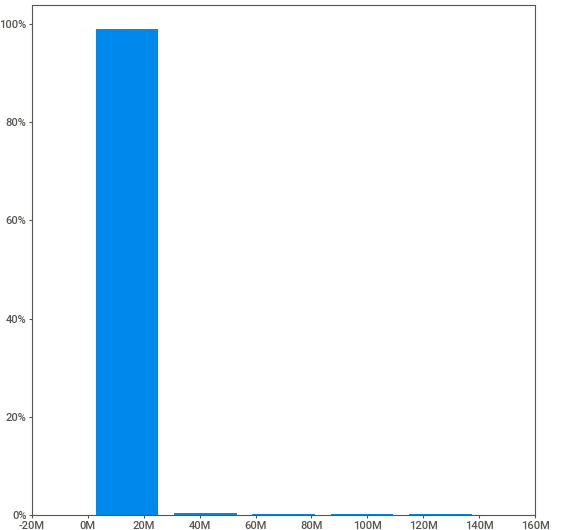
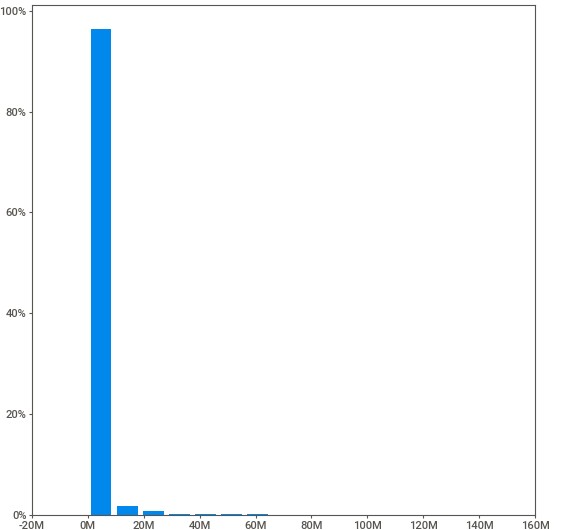
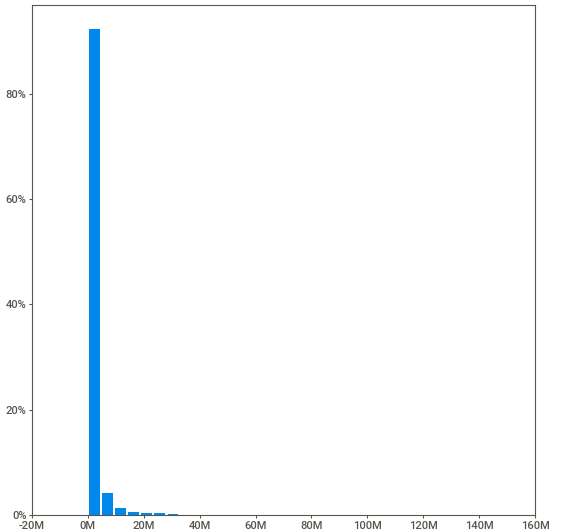
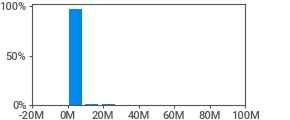
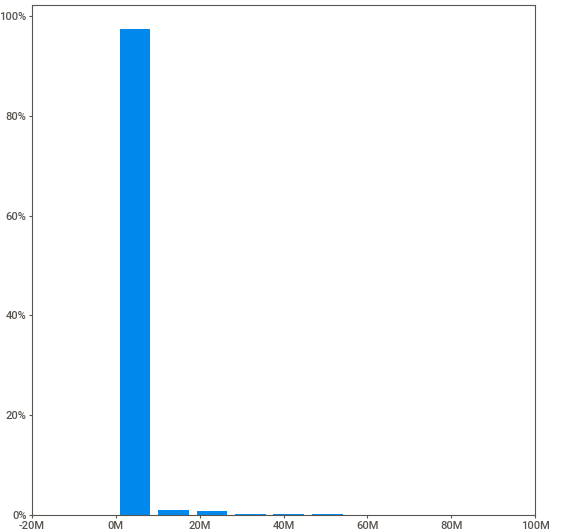
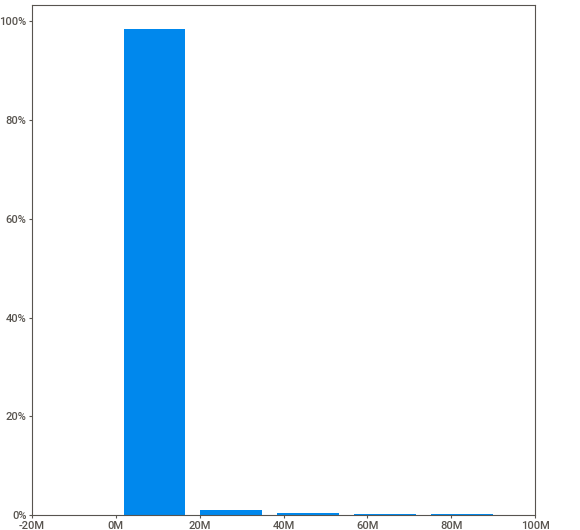
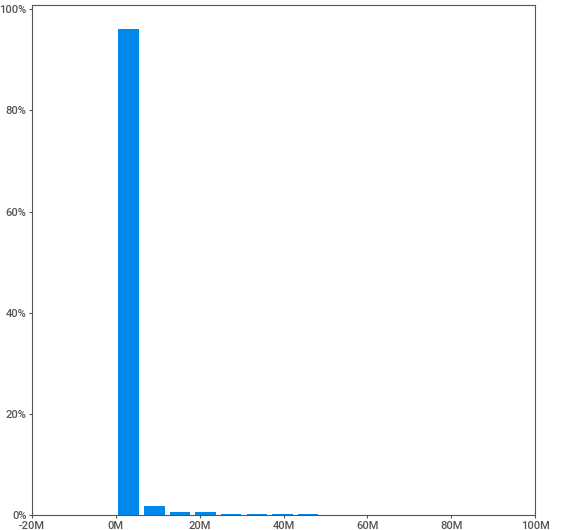
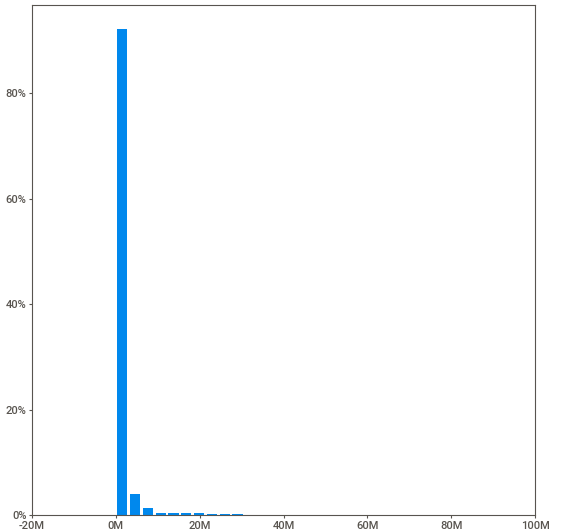
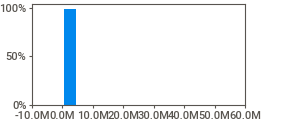
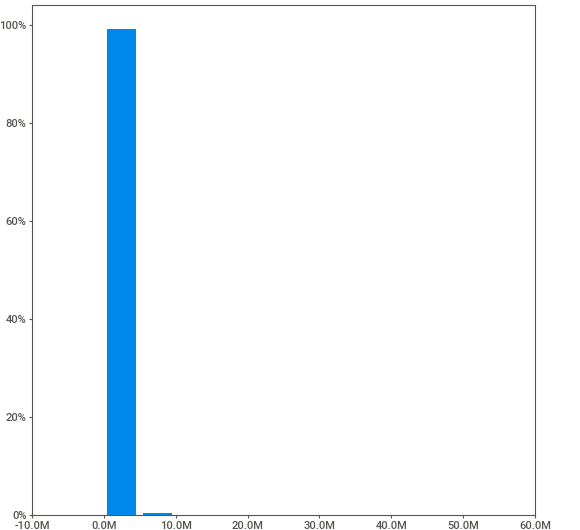
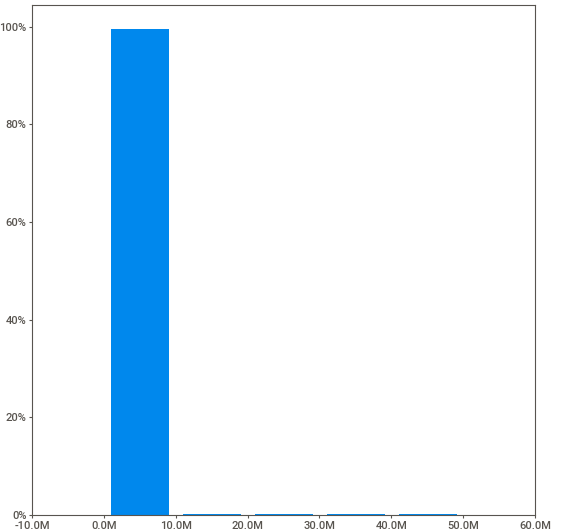
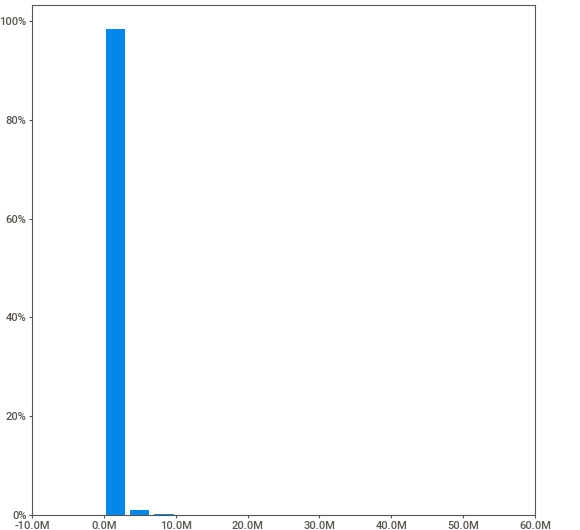
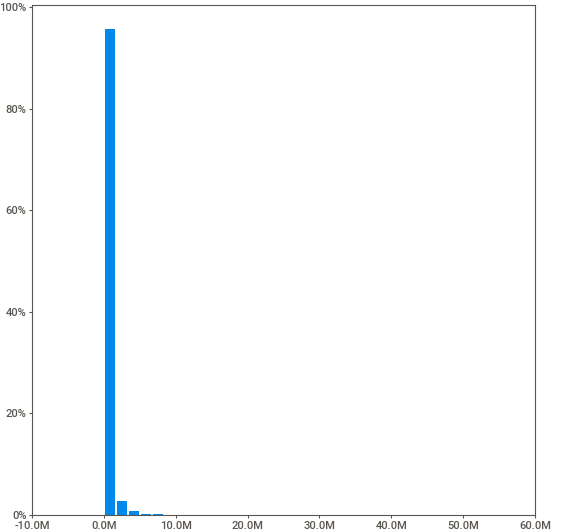
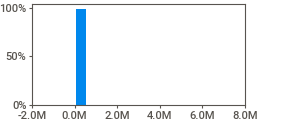
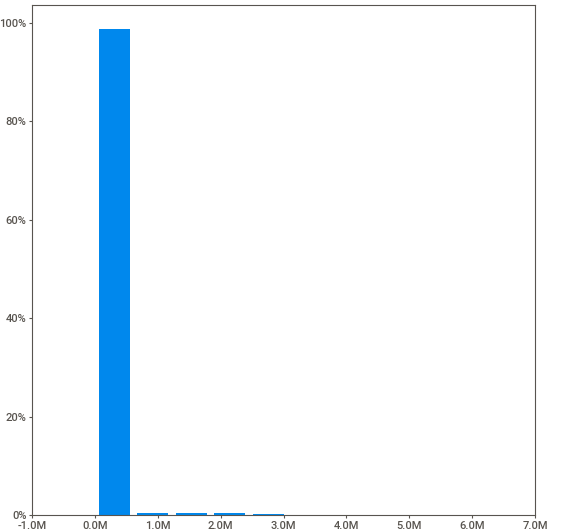
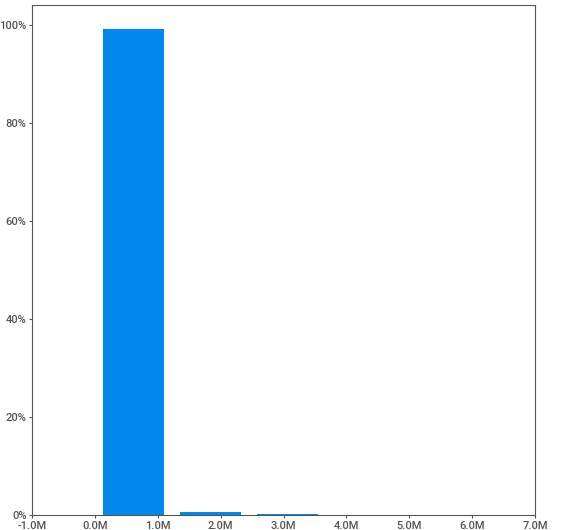
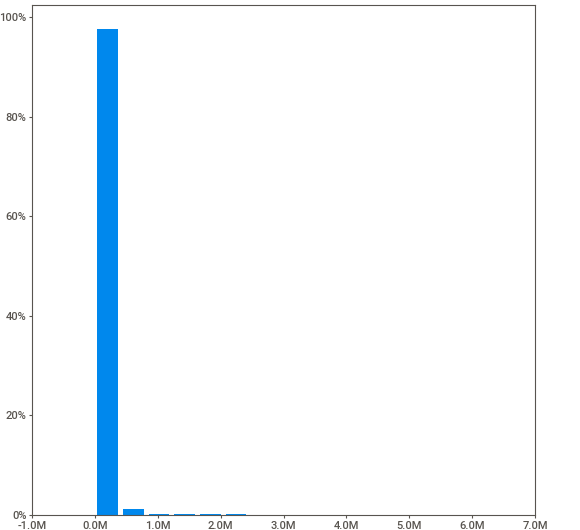
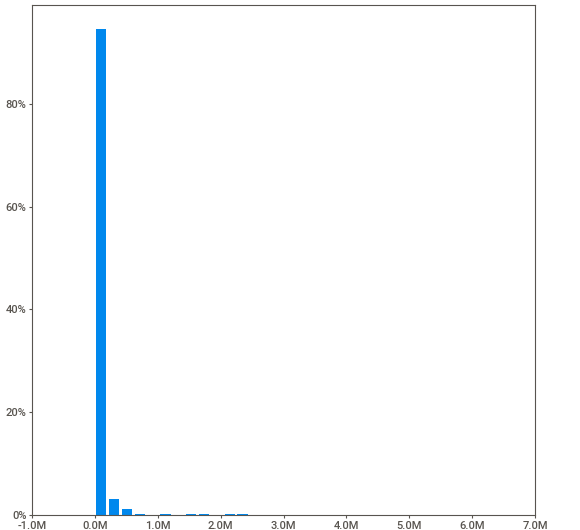
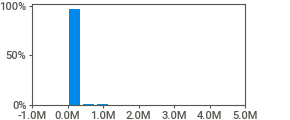
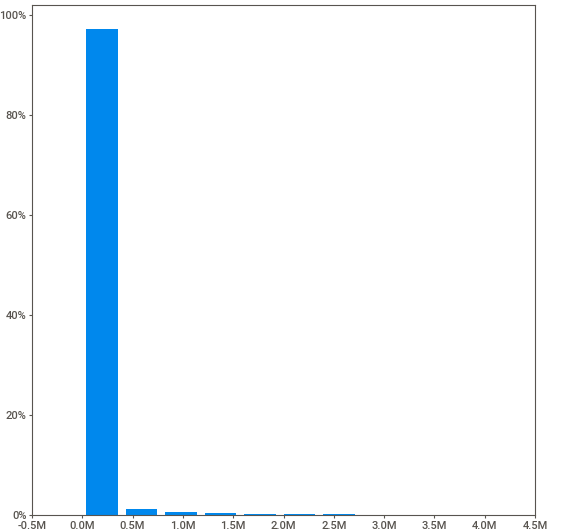
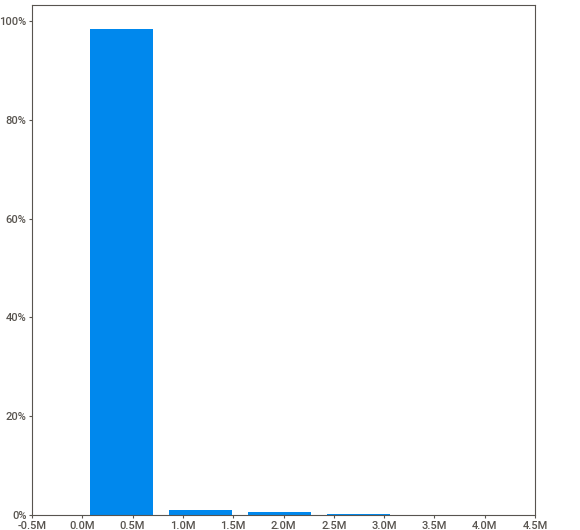
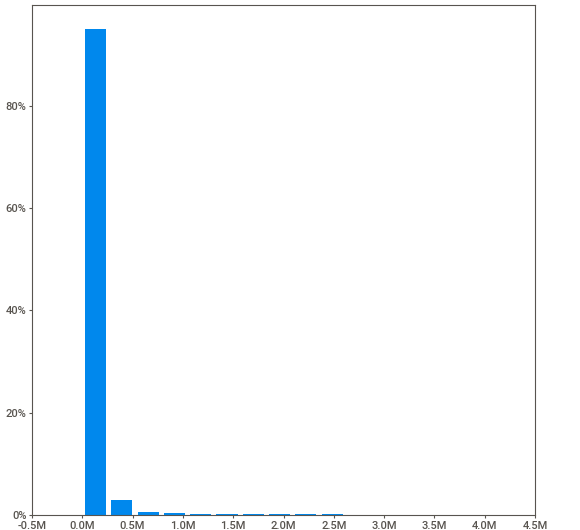
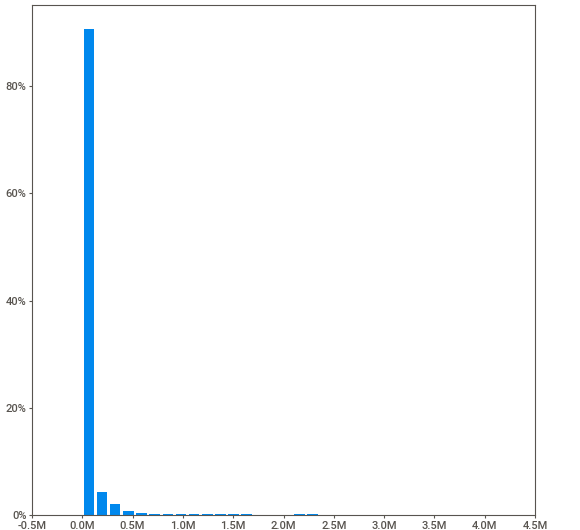
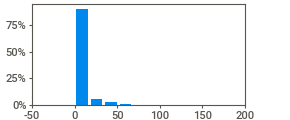
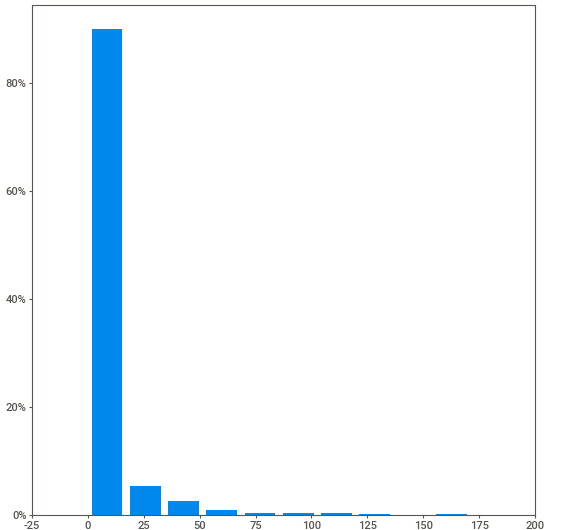
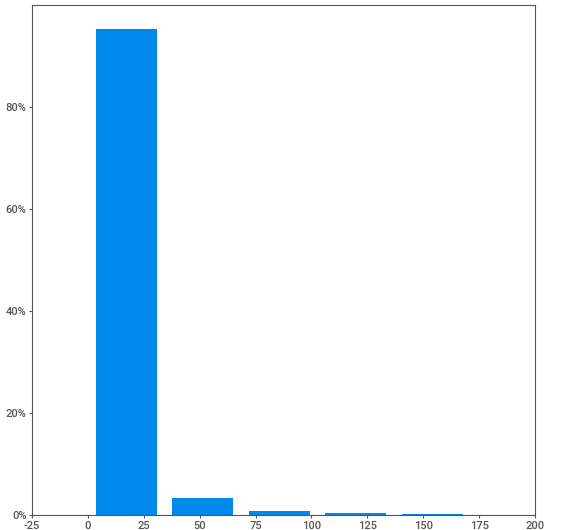
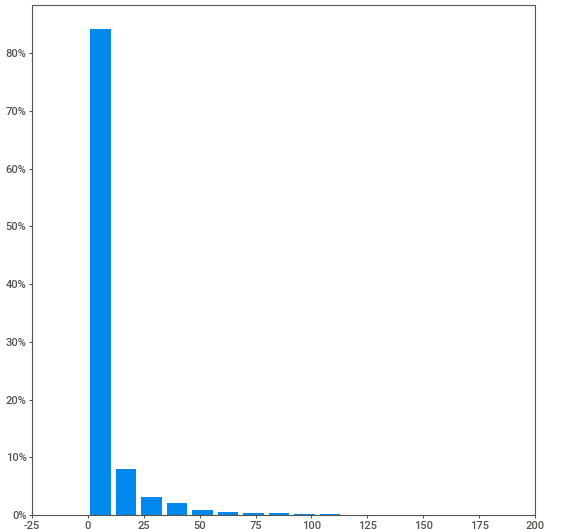
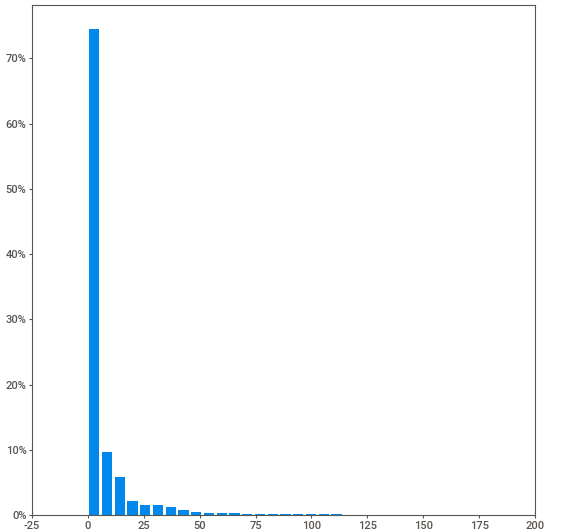
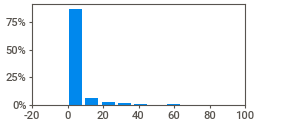
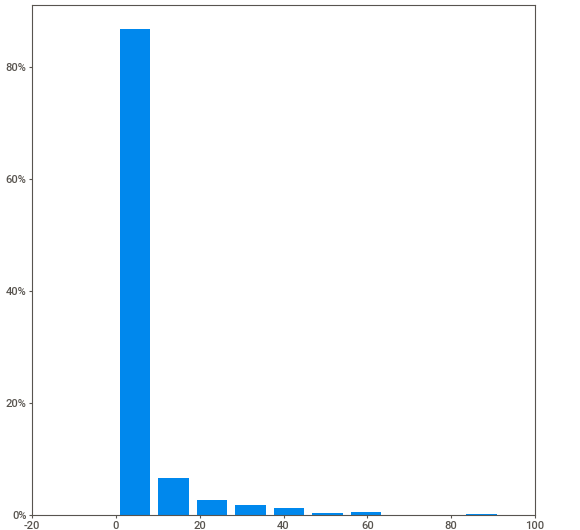
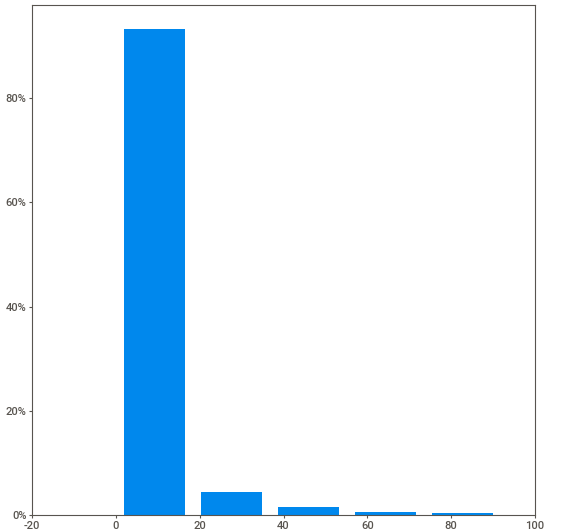
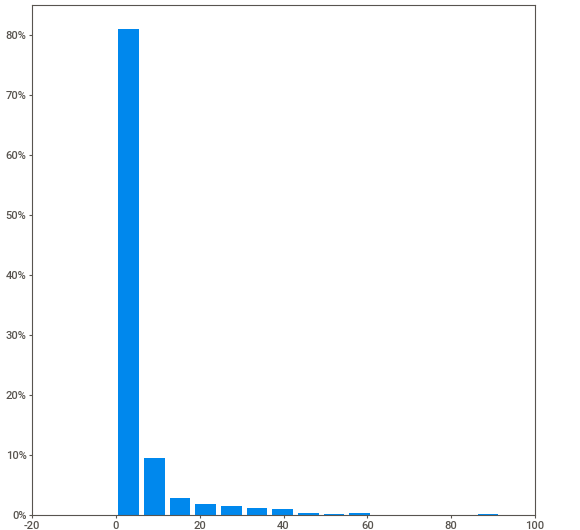
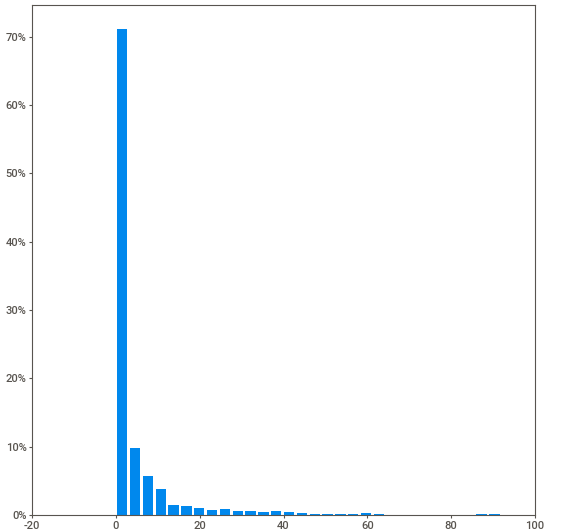
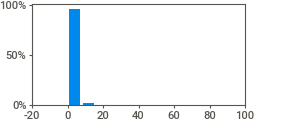
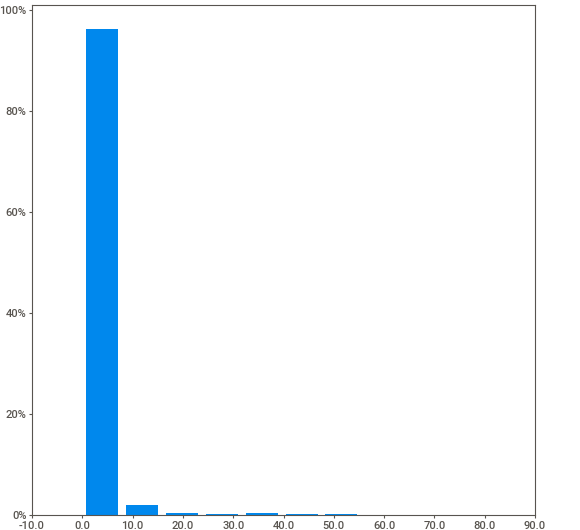
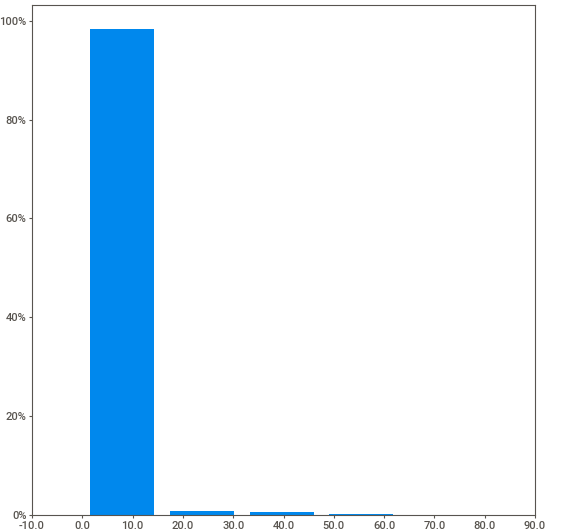
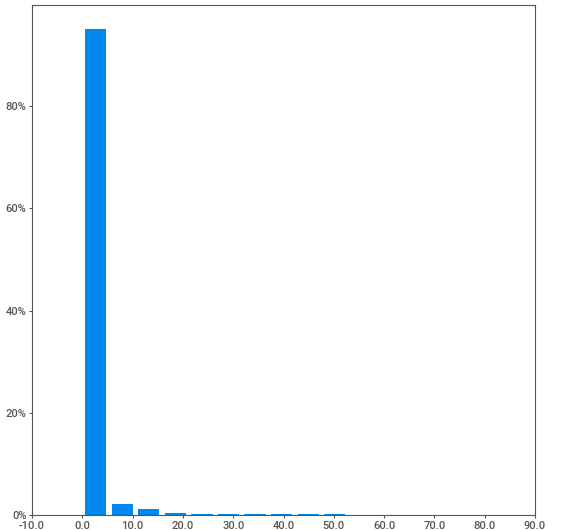
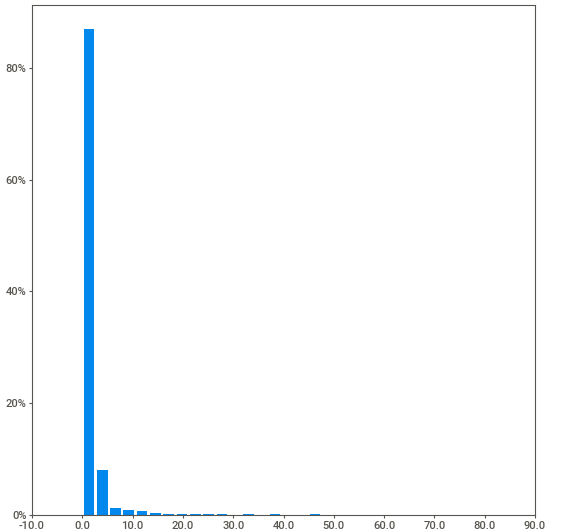
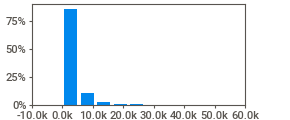
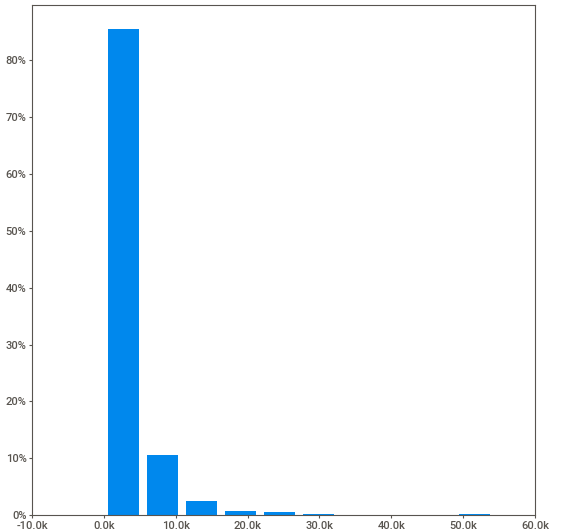
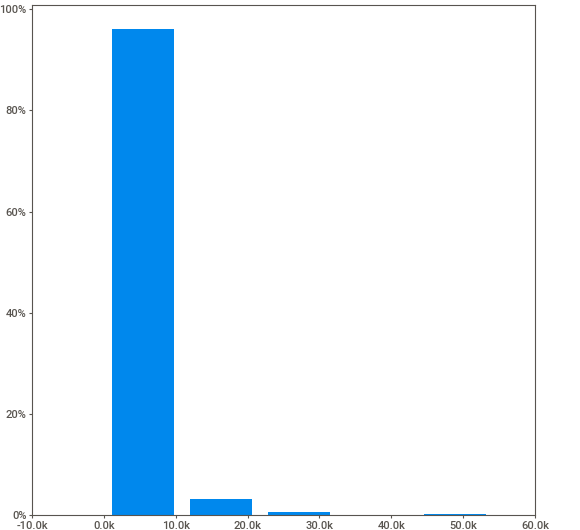
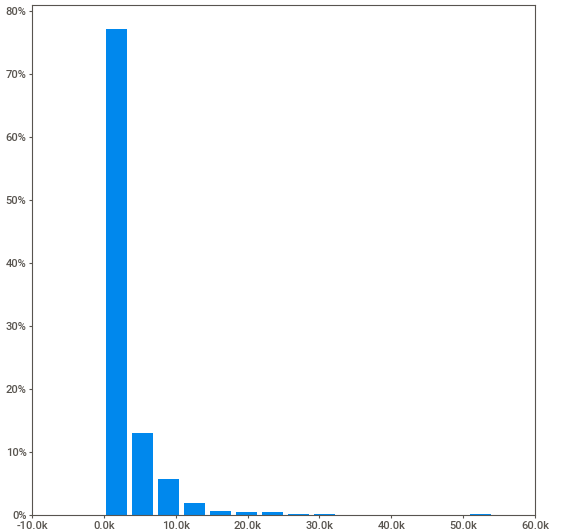
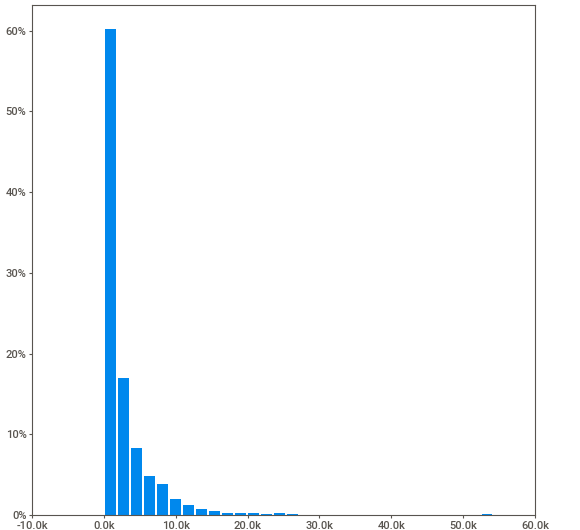
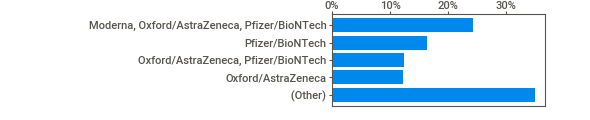
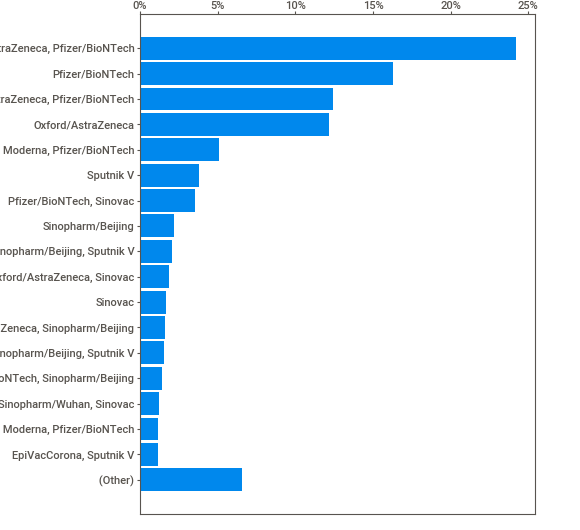
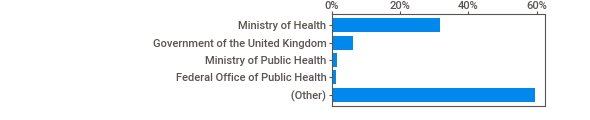
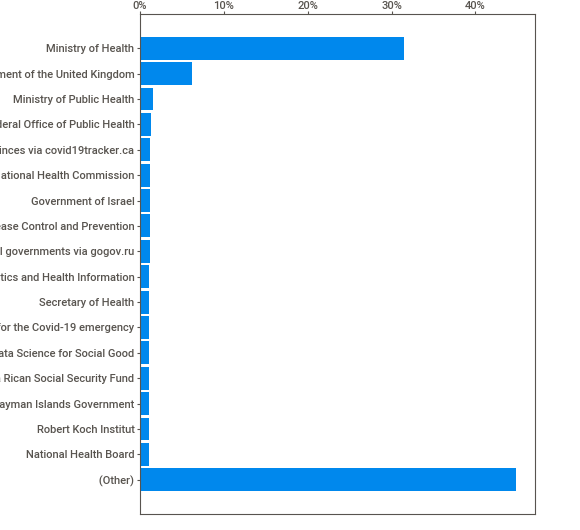
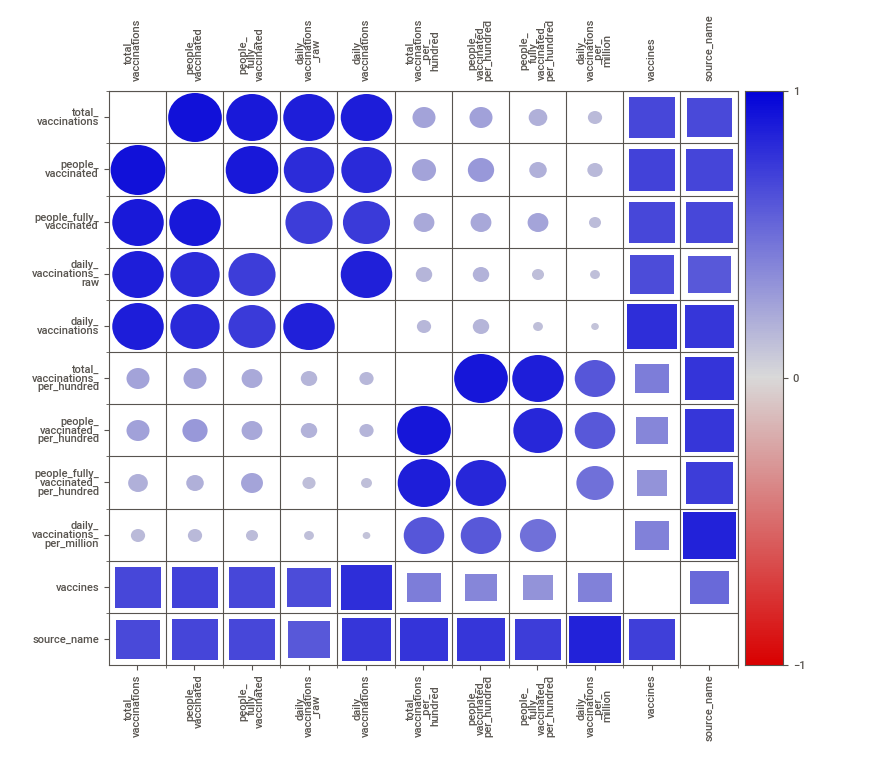
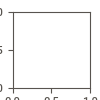

In [ ]:
import IPython
IPython.display.HTML('analyze.html')